# **Trabajo Practico 1 - NLP**

## **Ejercicio 1:**

Construir un dataset haciendo web scraping de páginas web de su elección.

● Definir 4 categorías de noticias/artículos.

● Para cada categoría, extraer los siguientes datos de 10 noticias diferentes:

○ url (sitio web donde se publicó el artículo)

○ título (título del artículo)

○ texto (contenido del artículo)

Recomendaciones: elegir blogs para evitar los límites de lectura para los medios que exigen suscripción. Investigue sobre el archivo robots.txt y téngalo en cuenta. Considere también espaciar las consultas para evitar saturar el sitio. Utilizando los datos obtenidos construya el dataset en formato csv.

**Categorias (reseñas de):**

- Videojuegos
- Peliculas
- Musica
- Hoteles

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import warnings

In [ ]:
# response = requests.get('https://rockentreamigos.com/2019/10/25/grupo-theatre-of-tragedy-discolast-curtain-call-ano2011/') #LO PASÉ A TRUE PARA QUE VERIFIQUE CREDENCIALES Y NO MUESTRE LA ADVERTENCIA EN EL OTRO BLOQUE

# soup = BeautifulSoup(response.text, 'html.parser')

# titulo = soup.find('h1')

# texto = soup.find('div', {'class': 'entry-content'})

# texto = texto.find_all(['p', 'h2'])

# parrafo = '\n'.join(par.text for par in texto)

In [ ]:
videojuegos = {
                0: "https://lavidaesunvideojuego.com/2023/10/18/resena-resident-evil-4-separate-ways-mucho-mas-que-un-simple-dlc/",
                1: 'https://lavidaesunvideojuego.com/2023/10/20/resena-crymachina-en-verdad-es-necesario-salvar-la-humanidad/',
                2: 'https://lavidaesunvideojuego.com/2023/10/09/resena-forza-motorsport-simulacion-en-su-maxima-expresion/',
                3: 'https://lavidaesunvideojuego.com/2023/10/10/assassins-creed-mirage-un-desierto-o-un-oasis/',
                4: 'https://lavidaesunvideojuego.com/2023/10/13/bilkins-folly-resena-un-desafio-digno-de-un-caza-tesoros/',
                5: 'https://lavidaesunvideojuego.com/2023/10/05/resena-truck-driver-the-american-dream-se-el-conductor-de-tu-propia-vida/',
                6: 'https://lavidaesunvideojuego.com/2023/10/02/resena-ea-sports-fc-24-un-nuevo-comienzo/',
                7: 'https://lavidaesunvideojuego.com/2023/09/13/age-of-empires-iv-se-lanza-a-la-conquista-de-la-series-x%e2%94%82s/',
                8: 'https://lavidaesunvideojuego.com/2023/09/11/resena-its-a-wrap-luces-camara-corten/',
                9: 'https://lavidaesunvideojuego.com/2023/09/07/resena-monochrome-mobius-rights-and-wrongs-forgotten-no-dejes-todo-para-el-final/',
                10: 'post-content clear',
                11: 'videojuegos'
              }

peliculas = {
              0: 'https://www.fotogramas.es/peliculas-criticas/a45579665/mi-otro-jon-critica-pelicula/',
              1: 'https://www.fotogramas.es/peliculas-criticas/a43950509/killers-of-the-flower-moon-critica-pelicula-scorsese-dicaprio-deniro/',
              2: 'https://www.fotogramas.es/peliculas-criticas/a45579872/el-reino-animal-critica-pelicula/',
              3: 'https://www.fotogramas.es/peliculas-criticas/a45503223/me-he-hecho-viral-critica-pelicula/',
              4: 'https://www.fotogramas.es/peliculas-criticas/a45503222/al-otro-lado-del-rio-y-entre-los-arboles-critica-pelicula/',
              5: 'https://www.fotogramas.es/peliculas-criticas/a45503811/critica-de-orlando-mi-biografia-politica/',
              6: 'https://www.fotogramas.es/peliculas-criticas/a45442429/exorcista-creyente-critica-pelicula-polemica/',
              7: 'https://www.fotogramas.es/peliculas-criticas/a45298263/critica-chinas-arantxa-echevarria-pelicula/',
              8: 'https://www.fotogramas.es/peliculas-criticas/a45238980/saw-x-critica-pelicula/',
              9: 'https://www.fotogramas.es/peliculas-criticas/a43975191/cerrar-los-ojos-critica-pelicula-victor-erice/',
              10: 'article-body-content article-body standard-body-content css-1vzhgcw ewisyje7',
              11: 'peliculas'
}

musica = {    0: 'https://rockentreamigos.com/2019/10/25/grupo-theatre-of-tragedy-discolast-curtain-call-ano2011/',
              1: 'https://rockentreamigos.com/2020/09/25/grupo-mercurio-disco-re-genesis-sellothe-fish-factory-ano2018/',
              2: 'https://rockentreamigos.com/2020/10/06/grupoiron-maiden-discosomewhere-in-time-ano1987-selloemi/',
              3: 'https://rockentreamigos.com/2023/03/10/grupobring-me-the-horizon-discosempiternal-sellorca-records-ano2013-nota95/',
              4: 'https://rockentreamigos.com/2023/05/11/grupo-cultes-des-ghoules-disco-henbane-or-sonic-compendium-of-the-black-arts-2013-sello-under-the-sign-of-garazel-productions/',
              5: 'https://rockentreamigos.com/2023/07/26/40-anos-del-inicio-de-un-genero-el-killem-all-de-metallica/',
              6: 'https://rockentreamigos.com/2019/09/05/grupo-judas-priest-disco-stained-class-ano-1980/',
              7: 'https://rockentreamigos.com/2023/08/28/grupoiron-maiden-disco-a-matter-of-life-and-death-selloemi-ano2006/',
              8: 'https://rockentreamigos.com/2023/09/04/rea-194-desenterrando-tesoros-viper-brazil-evolution-y-su-vida/',
              9: 'https://rockentreamigos.com/2023/10/18/grupo-queensryche-disco-promised-land-sello-emi-fecha-de-publicacion-18-de-octubre-de-1994/',
              10: 'entry-content',
              11: 'musica'
}


hoteles = {
            0: 'https://www.unmundopequenio.com/resena-la-merced-del-alto-cachi/',
            1: 'https://www.unmundopequenio.com/resena-hotel-apraxin-san-petersburgo/',
            2: 'https://www.unmundopequenio.com/resena-gia-vien-hotel-ho-chi-minh-city/',
            3: 'https://www.unmundopequenio.com/havana-hotel-el-cairo/',
            4: 'https://www.unmundopequenio.com/resena-balcon-de-la-plaza-salta/',
            5: 'https://www.unmundopequenio.com/resena-tara-place-bangkok/',
            6: 'https://www.unmundopequenio.com/resena-jj-bungalows-phi-phi/',
            7: 'https://www.unmundopequenio.com/resena-travelodge-fort-myers/',
            8: 'https://www.unmundopequenio.com/resena-comfort-inn-long-island-city-nueva-york/',
            9: 'https://www.unmundopequenio.com/albergo-enrica-hotel-en-roma/',
            10: 'entry-content',
            11: 'hoteles'
}

urls = [videojuegos, peliculas, musica, hoteles]

def web_scrapping(url, clase):

  ''' Descarga, extrae y retorna de las paginas web de la lista "urls" los titulos y textos de los respectivos articulos'''


  response = requests.get(url, verify=True) #LO PASÉ A TRUE PARA QUE VERIFIQUE CREDENCIALES Y NO MUESTRE LA ADVERTENCIA EN EL OTRO BLOQUE

  soup = BeautifulSoup(response.text, 'html.parser')

  titulo = soup.find('h1')

  texto = soup.find('div', {'class': clase})

  texto = texto.find_all(['p', 'h2'])



  parrafo = '\n'.join(par.text for par in texto)

  return titulo.text, parrafo

In [ ]:
# Lista de columnas (vacias) para crear luego un df
data = {'url': [], 'titulo': [], 'texto': [], 'categoria': []}

# DataFrame con columnas vacio
dataset = pd.DataFrame(data)

warnings.filterwarnings("ignore", category=FutureWarning) #AGREGUE ESTE IGNORE PARA NO MOSTRAR LAS ADVERTENCIAS DE PD

# Iteramos sobre lista de urls
for categoria in urls:
  # Tomamos cada elemento de cada categoria, a excepcion de los dos ultimos que contienen: la clase de la etiqueta que contiene el cuerpo del artiuclo
  # y el nombre de la categoria
  for i in range( len(categoria) - 2 ):

    # Extraemos el titulo y el articulo en si
    titulo, texto = web_scrapping(categoria[i], categoria[10])
    # Extraemos el nombre de la categoria
    nombre_categoria = categoria[11]

    # Creamos un diccionario con los valores de la nueva fila
    nueva_fila = {'url': categoria[i], 'titulo': titulo, 'texto': texto, 'categoria': nombre_categoria}

    # Lo agregamos al df
    dataset = dataset.append(nueva_fila, ignore_index=True)

In [ ]:
dataset

In [ ]:
# Exportamos el df como .csv
dataset.to_csv('articulos.csv', index=False)

## **Ejercicio 2:**

**Utilizando los datos de título y categoría del dataset del ejercicio anterior, entrenar un modelo de clasificación de noticias en categorías específicas.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
import numpy as np

# Descargamos los stopwords que necesitaremos luego
nltk.download('stopwords')
from nltk.corpus import stopwords

# Obtenemos las stopwords para español
spanish_stop_words = stopwords.words('spanish')

# Copiamos lo que nos interesa del dataset
datos = dataset[['titulo', 'categoria']].copy()

# Codificacion de variable independiente
labels = { "videojuegos": 0, "peliculas": 1, "musica": 2,
          "hoteles": 3}

# Mapeo de categorica a cuantiativa
datos['categoria'] = datos['categoria'].map(labels)

# Eliminamos signos de puntuacion
datos['titulo'] = datos['titulo'].str.replace('[^\w\s]', '')

# Convertimos a minusculas
datos['titulo'] = datos['titulo'].str.lower()

# Eliminamos acentos para homogeneizar el texto
import unicodedata

def remove_accents(input_str):
  nfkd_form = unicodedata.normalize('NFKD', input_str)
  return ''.join([c for c in nfkd_form if not unicodedata.combining(c)])

datos['titulo'] = datos['titulo'].apply(lambda titulo: remove_accents(titulo))

# Eliminamos algunas palabras que pueden ser comunes a todos los titulos
datos['titulo'] = datos['titulo'].str.replace('resena', '').str.replace('critica', '')

X = datos['titulo']
y = datos['categoria']

# Se prefiere una vectorizacion con TF-IDF debido a que puede funcionar bien conjunto de datos pequeños. BERT es mas propenso al sobreajuste con pocos datos.

# Vectorización de los textos con eliminación de palabras vacías
vectorizer = TfidfVectorizer(stop_words=spanish_stop_words)
X_vectorized = vectorizer.fit_transform(X)

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=45)

# Creación y entrenamiento del modelo de Regresión Logística
modelo_LR = LogisticRegression(max_iter=1000)
modelo_LR.fit(X_train, y_train)

# Evaluación del modelo de Regresión Logística
y_pred = modelo_LR.predict(X_test)
acc_LR = accuracy_score(y_test, y_pred)
report_LR = classification_report(y_test, y_pred, zero_division=1)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Precisión Regresión Logística:", acc_LR)
print("Reporte de clasificación Regresión Logística:\n", report_LR)
print("Matriz de Confusión:")
print(conf_matrix)

Precisión Regresión Logística: 0.25
Reporte de clasificación Regresión Logística:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00         4
           1       0.00      0.00      0.00         2
           2       0.25      1.00      0.40         1
           3       0.33      1.00      0.50         1

    accuracy                           0.25         8
   macro avg       0.40      0.50      0.23         8
weighted avg       0.57      0.25      0.11         8

Matriz de Confusión:
[[0 1 3 0]
 [0 0 0 2]
 [0 0 1 0]
 [0 0 0 1]]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Codificacion de variable independiente
labels_2 = { 0: "videojuegos", 1: "peliculas" , 2: "musica",
          3: "hoteles"}

# Definimos una lista de frases para clasificar
nuevas_frases = [
    "Reseña Killer Frequency: Desata el terror de los años 80",
    'Reseña LEGO 2K Drive, construye, corre y disfruta',
    'Reseña Cannon Dancer: Osman, un poco de nostalgia',
    "Reseña: Hotel Audran (París)",
    "Reseña: Nefertiti Hotel (Luxor)",
    'Crítica de ‘Divertimento’, una ‘feel-good movie’ francesa basada en hechos reales',
    'Crítica de El poder del perro',
    'Crítica de Parásitos',
    'Banda: MORS SUBITA Disco: Origin of Fire Sello: Out of Line Music Año: 2023',
    'Grupo:MERCENARY. Disco:“Soundtrack for the End Times”. Sello:NoiseArt Records. Año:2023.',
    'Banda: RED CAIN Disco: NÄE´BLISS Sello: Autoeditado Año: 2023'
]

# Guardamos los titulos que vamos a probar en un nuevo df
nuevos_datos = pd.DataFrame({'titulo': nuevas_frases})

# Realizamos la misma limpieza que hicimos a los datos de entrenamiento y test:

# Eliminamos signos de puntuacion
nuevos_datos['titulo'] = nuevos_datos['titulo'].str.replace('[^\w\s]', '')

# Convertimos a minusculas
nuevos_datos['titulo'] = nuevos_datos['titulo'].str.lower()

# Eliminamos los acentos
nuevos_datos['titulo'] = nuevos_datos['titulo'].apply(lambda titulo: remove_accents(titulo))

# Eliminamos algunas palabras que pueden ser comunes a todos los titulos
nuevos_datos['titulo'] = nuevos_datos['titulo'].str.replace('resena', '').str.replace('critica', '')

# Transformamos las nuevas frases usando el vectorizador que usamos para entrenar el modelo
nuevas_frases_vectorizadas = vectorizer.transform(nuevos_datos['titulo'])

# Usamos el modelo entrenado para predecir las etiquetas de las nuevas frases
etiquetas_predichas = modelo_LR.predict(nuevas_frases_vectorizadas)

# Imprimimos las etiquetas predichas
for i, etiqueta in enumerate(etiquetas_predichas):
    print(f"La frase '{nuevas_frases[i]}' pertenece a la categoría: {labels_2[etiqueta]}")

La frase 'Reseña Killer Frequency: Desata el terror de los años 80' pertenece a la categoría: musica
La frase 'Reseña LEGO 2K Drive, construye, corre y disfruta' pertenece a la categoría: hoteles
La frase 'Reseña Cannon Dancer: Osman, un poco de nostalgia' pertenece a la categoría: hoteles
La frase 'Reseña: Hotel Audran (París)' pertenece a la categoría: hoteles
La frase 'Reseña: Nefertiti Hotel (Luxor)' pertenece a la categoría: hoteles
La frase 'Crítica de ‘Divertimento’, una ‘feel-good movie’ francesa basada en hechos reales' pertenece a la categoría: hoteles
La frase 'Crítica de El poder del perro' pertenece a la categoría: hoteles
La frase 'Crítica de Parásitos' pertenece a la categoría: hoteles
La frase 'Banda: MORS SUBITA Disco: Origin of Fire Sello: Out of Line Music Año: 2023' pertenece a la categoría: musica
La frase 'Grupo:MERCENARY. Disco:“Soundtrack for the End Times”. Sello:NoiseArt Records. Año:2023.' pertenece a la categoría: musica
La frase 'Banda: RED CAIN Disco: NÄE´

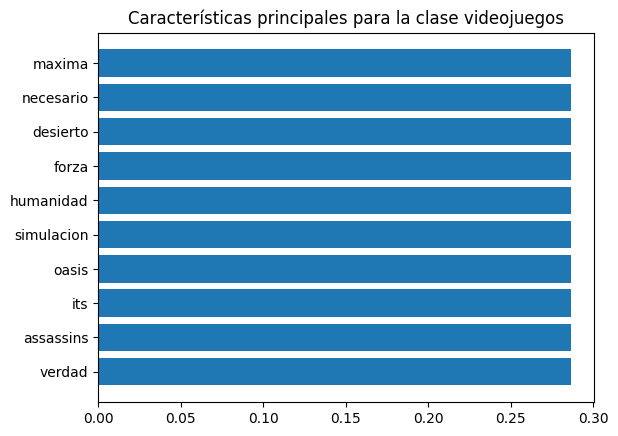

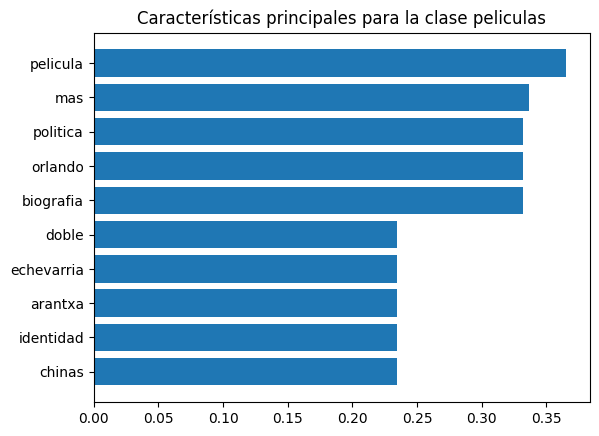

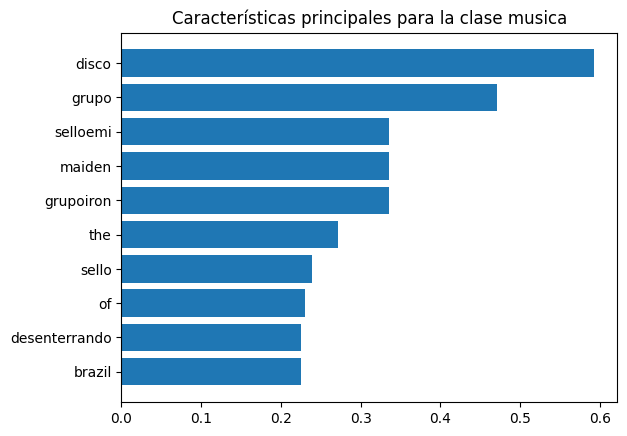

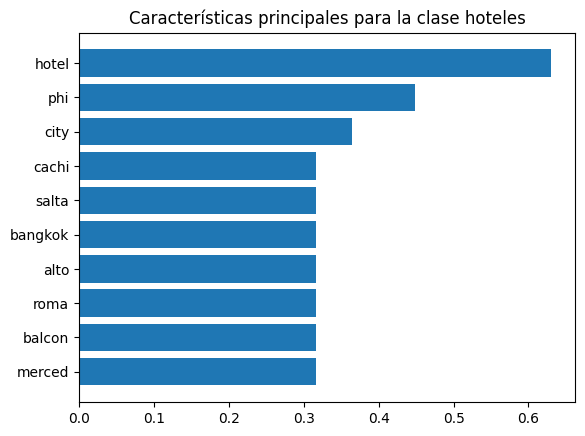

In [ ]:
import matplotlib.pyplot as plt

# Obtén los nombres de las características y los coeficientes
feature_names = vectorizer.get_feature_names_out()
coef = modelo_LR.coef_

# Visualiza los coeficientes más importantes para cada clase
num_top_features = 10
for i, label in enumerate(labels_2.values()):
    top_features_idx = np.argsort(coef[i])[-num_top_features:]
    top_features_names = [feature_names[j] for j in top_features_idx]
    top_features_coef = coef[i][top_features_idx]

    plt.figure()
    plt.barh(top_features_names, top_features_coef)
    plt.title(f'Características principales para la clase {label}')
    plt.show()

Conclusiones:

Las metricas no dan para nada bien, pero es de esperar debido a la poca cantidad de datos que tenemos. En el grafico que muestra las palabras que mas influyen al modelo, en videojuegos se pueden ver palabras como maxima, necesario y desierto, que seguramente en un dataset de tamaño considerable de titulos no aparecerian.

Lo mejor para obtener buenos resultados con tan pocos datos o hubiera sido no elegir todas criticas o aumentar bastante la cantidad de datos.

## **Ejercicio 3:**

Para cada categoría, realizar las siguientes tareas:

● Procesar el texto mediante recursos de normalización y limpieza.

● Con el resultado anterior, realizar conteo de palabras y mostrar la importancia de las mismas mediante una nube de palabras.

Escribir un análisis general del resultado obtenido.

In [ ]:
# Leemos el csv
archivo = pd.read_csv('articulos.csv')

In [ ]:
#Librería para tratar los emojis
!pip install demoji
import demoji

# Descarga el conjunto de datos de emoji
demoji.download_codes()

#Librería para stopwords y frecuencias
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
nltk.download('punkt')

# Descargar el conjunto de palabras de parada en español
nltk.download('stopwords')
nltk.download('punkt')

# Definir las palabras de parada en español
stop_words = set(stopwords.words('spanish'))

#Librería para lematización
!python -m spacy download es_core_news_sm
import es_core_news_sm

#Librería para nubes de palabras
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.8 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


2023-10-30 22:09:25.214537: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-30 22:09:25.214608: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-30 22:09:25.214644: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-30 22:09:25.223886: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-30 22:09:26.500160: W tensorflow/compiler/

In [ ]:
# Crear un diccionario para almacenar los textos por categoría
textos_por_categoria = {}

# Iterar a través de las categorías y extraer los textos correspondientes
for categoria in archivo.categoria.unique():
    # Filtrar el DataFrame para la categoría actual
    df_categoria_actual = archivo[archivo['categoria'] == categoria]

    # Extraer los textos de la categoría actual y los almacena en una lista
    textos_categoria_actual = df_categoria_actual['texto'].tolist()

    # Almacena la lista de textos en el diccionario usando la categoría como clave
    textos_por_categoria[categoria] = textos_categoria_actual

In [ ]:
# Función para eliminar stopwords de una frase
def remove_stopwords(text):
  word_tokens = word_tokenize(text)
  filtered_text = [word for word in word_tokens if word.casefold() not in stop_words]
  return " ".join(filtered_text)

#Función para procesar el texto
def procesar_texto(textos_por_categoria):
  #Se carga la función para lematizar
  nlp = es_core_news_sm.load()

  for texto in textos_por_categoria:
    #Se quitan los emojis del texto
    sin_emojis = demoji.replace(texto,'')

    #Se lematiza para obtener la raíz de cada palabra
    texto_lematizado = [token.lemma_.lower() for token in nlp(sin_emojis)]
    texto_lematizado = ' '.join(texto_lematizado)

    #Se eliminan las stopwords
    sin_stop_words = remove_stopwords(texto_lematizado)

    #Se cuenta la frecuencia de las palabras
    words = word_tokenize(sin_stop_words)

    # Creamos un objeto FreqDist para las palabras
    fdist_words = FreqDist(words)

  # Se guardan el total de palabras y las frecuencias
  total_palabras = f'Total de palabras: {len(fdist_words)}'
  frecuencia = dict(fdist_words)
  return total_palabras, dict(sorted(frecuencia.items())), sin_stop_words

#Función para generear nubes de palabras
def generar_nube_palabras(categorias):
  n = 0
  plt.figure(figsize = (14,14), facecolor = None)
  for categoria in categorias:
    plt.subplot(141+n)
    wordcloud = WordCloud(width = 800, height = 800,
                            background_color ='white',
                            stopwords = None,
                            min_font_size = 10).generate(procesar_texto(textos_por_categoria[categoria])[2])
    plt.axis("off")
    plt.title(f'Categoria {categoria}',color='navy',fontweight='bold',fontsize=12, pad=15)
    plt.tight_layout(pad = 1.5)
    plt.imshow(wordcloud)
    n += 1
  plt.show()

**Comentario : falta procesar y eliminar caracteres especiales y algunos links que se imprimen.**

### **Resultados**

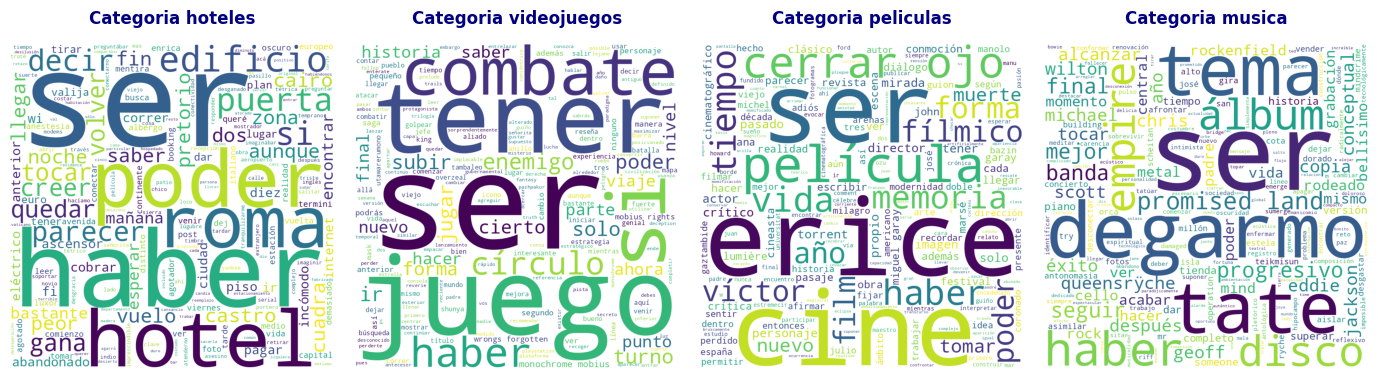

In [ ]:
generar_nube_palabras(['hoteles','videojuegos','peliculas','musica'])

In [ ]:
procesar_texto(textos_por_categoria['peliculas'])[:2]

In [ ]:
procesar_texto(textos_por_categoria['hoteles'])[:2]

In [ ]:
procesar_texto(textos_por_categoria['musica'])[:2]

In [ ]:
procesar_texto(textos_por_categoria['videojuegos'])[:2]

## **Ejercicio 4:**

**Use los modelos de embedding propuestos sobre el final de la Unidad 2 para evaluar la similitud entre los títulos de las noticias de una de las categorías.**
**Reflexione sobre las limitaciones del modelo en base a los resultados obtenidos, en contraposición a los resultados que hubiera esperado obtener.**


### Dependencias y librerias

In [ ]:
# Primero preparamos el entorno en Colab
%%capture

# Todos los modelos
!pip install unidecode
from unidecode import unidecode
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Primer modelo: Promedio de Word Embeddings
!pip install spacy
!python -m spacy download en_core_web_md
import en_core_web_md

# Segundo modelo: Universal Sentence Encoder
!pip install "tensorflow-text"
!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-text
!pip install bokeh==2.4.3
!pip install simpleneighbors[annoy]
!pip install tqdm

import tensorflow_text
import bokeh
import bokeh.models
import bokeh.plotting
import os
import tensorflow.compat.v2 as tf
import tensorflow_hub as hub
import sklearn

# Tercer modelo: Doc2Vec
!pip install gensim

import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Cuarto modelo: S-BERT
!pip install sentence-transformers

from sentence_transformers import SentenceTransformer, util
from prettytable import PrettyTable

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Implementación

#### Variables inciciales

In [ ]:
# Separamos los títulos de una categoría que eligamos
chosen_category = 'videojuegos'
data_ej4 = dataset[dataset['categoria'] == chosen_category]
titles = data_ej4['titulo']  # Solo almacenamos los títulos de dicha categoría

titles_list = []
for title in titles:
    title = re.sub(r'[!,¿¡’?]', '', title.lower()) # Eliminamos signos de exclamación, integorración, etc. y convertimos a minúscula
    title = unidecode(title) # Eliminamos las tíldes
    titles_list.append(title)  # Guardamos dentro de una lista los titulos para facilitar el manejo de los mismos

#### Primer modelo: **Promedio de Word Embeddings**

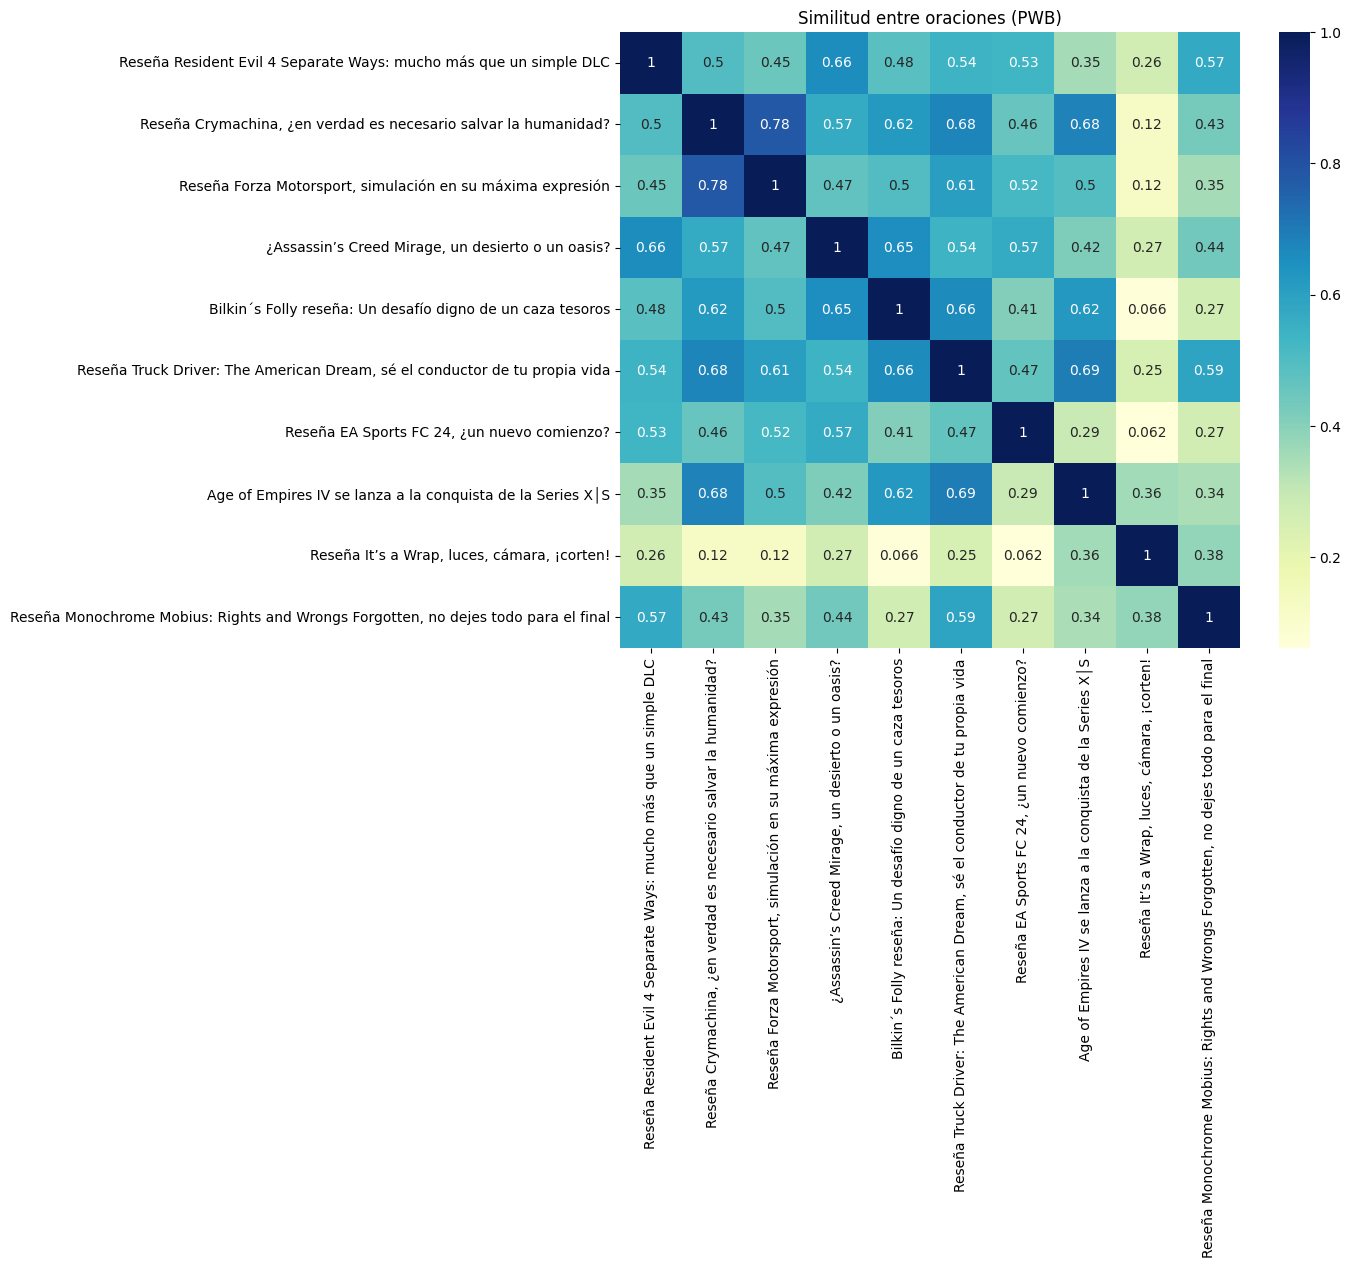

In [ ]:
nlp = en_core_web_md.load()
similarities = []
for i in titles_list:
    row = []
    for x in titles_list:
        sim = nlp(i).similarity(nlp(x))
        row.append(sim)
    similarities.append(row)

# Creamos un mapa de calor de la matriz de similitud
plt.figure(figsize=(10, 8))
sns.heatmap(similarities, annot=True, xticklabels=titles, yticklabels=titles, cmap="YlGnBu")
plt.title("Similitud entre oraciones (PWB)")
plt.show()

#### Segundo modelo: **Universal Sentence Encoder (USE)**

In [ ]:
def visualize_similarity(embeddings_1, embeddings_2, labels_1, labels_2,
                         plot_title,
                         plot_width=1200, plot_height=600,
                         xaxis_font_size='12pt', yaxis_font_size='12pt'):

  assert len(embeddings_1) == len(labels_1)
  assert len(embeddings_2) == len(labels_2)

  # arccos based text similarity (Yang et al. 2019; Cer et al. 2019)
  sim = 1 - np.arccos(
      sklearn.metrics.pairwise.cosine_similarity(embeddings_1,
                                                 embeddings_2))/np.pi

  embeddings_1_col, embeddings_2_col, sim_col = [], [], []
  for i in range(len(embeddings_1)):
    for j in range(len(embeddings_2)):
      embeddings_1_col.append(labels_1[i])
      embeddings_2_col.append(labels_2[j])
      sim_col.append(sim[i][j])
  df = pd.DataFrame(zip(embeddings_1_col, embeddings_2_col, sim_col),
                    columns=['embeddings_1', 'embeddings_2', 'sim'])

  mapper = bokeh.models.LinearColorMapper(
      palette=[*reversed(bokeh.palettes.YlOrRd[9])], low=df.sim.min(),
      high=df.sim.max())

  p = bokeh.plotting.figure(title=plot_title, x_range=labels_1,
                            x_axis_location="above",
                            y_range=[*reversed(labels_2)],
                            width=plot_width, height=plot_height,
                            tools="save",toolbar_location='below', tooltips=[
                                ('pair', '@embeddings_1 ||| @embeddings_2'),
                                ('sim', '@sim')])
  p.rect(x="embeddings_1", y="embeddings_2", width=1, height=1, source=df,
         fill_color={'field': 'sim', 'transform': mapper}, line_color=None)

  p.title.text_font_size = '12pt'
  p.axis.axis_line_color = None
  p.axis.major_tick_line_color = None
  p.axis.major_label_standoff = 16
  p.xaxis.major_label_text_font_size = xaxis_font_size
  p.xaxis.major_label_orientation = 0.25 * np.pi
  p.yaxis.major_label_text_font_size = yaxis_font_size
  p.min_border_right = 300

  bokeh.io.output_notebook()
  bokeh.io.show(p)

# El modelo que usaremos es uno multilingüe (de 16 idiomas)
module_url = 'https://tfhub.dev/google/universal-sentence-encoder-multilingual/3'
model = hub.load(module_url)

def embed_text(input):
  return model(input)
embed_titles = embed_text(titles_list)

visualize_similarity(embed_titles, embed_titles, titles_list, titles_list, 'Similitud entre títulos (USE)')

<ipython-input-41-fdeac635cb17>:10: RuntimeWarning: invalid value encountered in arccos
  sim = 1 - np.arccos(


#### Tercer modelo: **Doc2Vec**

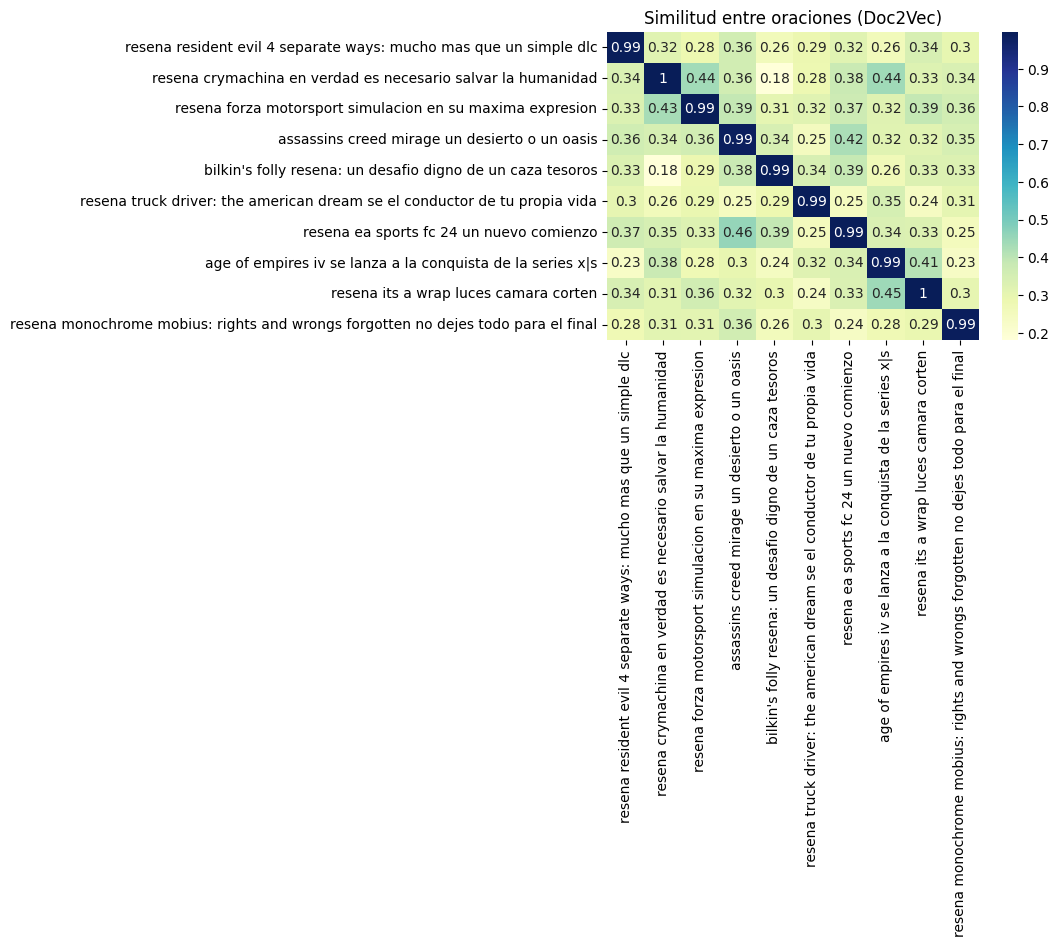

In [ ]:
# Tokenizamos los datos y los etiquetamos
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(titles_list)]

# Configuramos los parámetros para el modelo
model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=1000)

# Contruimos el vocabulario
model.build_vocab(tagged_data)

# Entrenamos el modelo
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

similarities_d2v = []
for i in titles_list:
    vector = model.infer_vector(word_tokenize(str(i).lower()))

    similares = model.dv.most_similar(vector) # Vemos las similitudes de cada título con todos los demás
    similarities_d2v.append(similares) # Los guardamos en una lista

# Ordenamos cada sublista según el índice de cada tupla
sorted_similarities = [sorted(sublist, key=lambda x: int(x[0])) for sublist in similarities_d2v]

# Luego separamos de cada tupla el segundo elemento de cada sublista, este representa la similitud de cada título con los demás
heatmap_similarities = [[tup[1] for tup in sublista] for sublista in sorted_similarities]

# Creamos un mapa de calor
plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_similarities, annot=True, xticklabels=titles_list, yticklabels=titles_list, cmap="YlGnBu")
plt.title("Similitud entre oraciones (Doc2Vec)")
plt.show()

#### Cuarto modelo: **Sentence-BERT (S-BERT)**

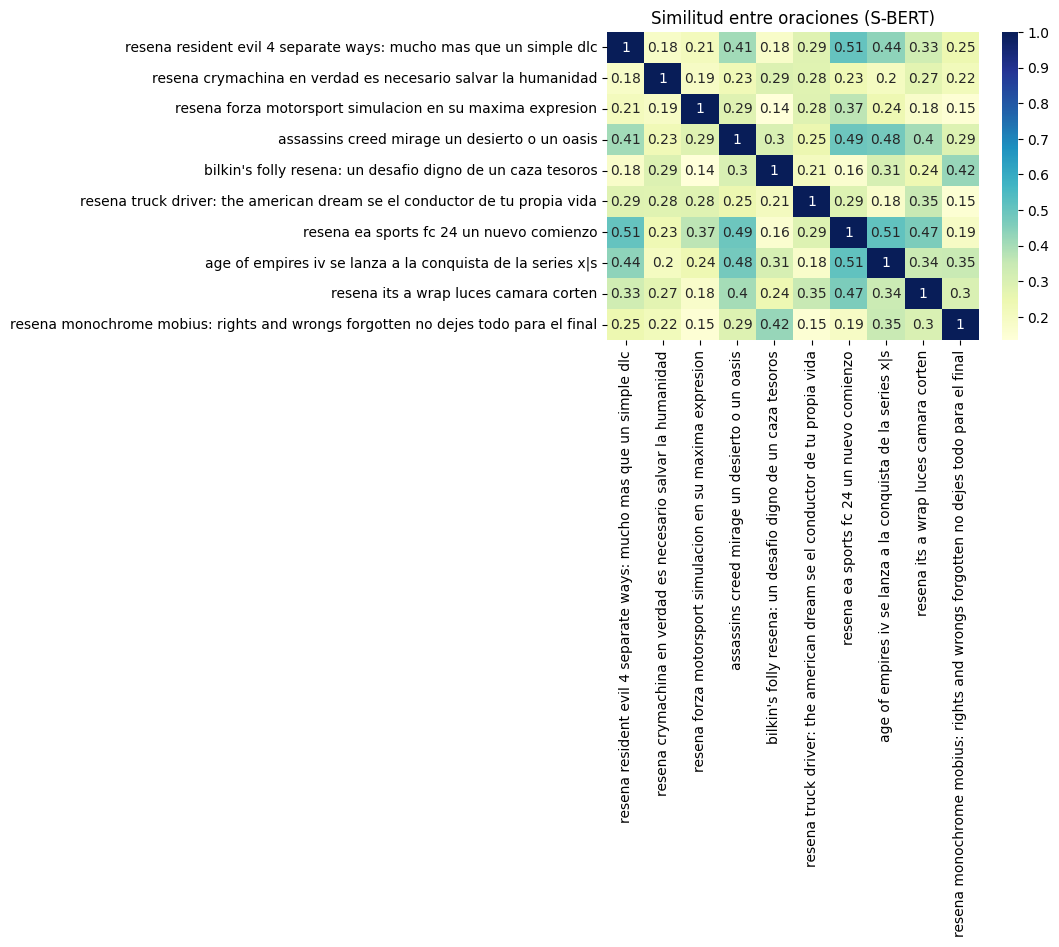

In [ ]:
# Cargamos el modelo preentrenado all-mpnet-base-v2
modelo = SentenceTransformer('all-mpnet-base-v2')

# Codificamos las oraciones
embeddings = modelo.encode(titles_list, convert_to_tensor=True)

# Calculamos las puntuaciones de similitud
cosine_scores = util.cos_sim(embeddings, embeddings)

# Creamos un mapa de calor
plt.figure(figsize=(6, 4))
sns.heatmap(cosine_scores, annot=True, xticklabels=titles_list, yticklabels=titles_list, cmap="YlGnBu")
plt.title("Similitud entre oraciones (S-BERT)")
plt.show()

#### Reflexiones sobre los modelos

Cada modelo emplea diversas técnicas para analizar la semántica de cada título y determinar si son similares o no. Estos modelos varían desde el enfoque más básico hasta el más sofisticado, y, en consecuencia, producen resultados diferentes. Sin embargo, al examinar todos los títulos en la categoría de videojuegos, notamos que hay numerosos títulos que siguen la estructura de 'Reseñas a...'. En otras palabras, muchos títulos comparten un tema común: la reseña de un videojuego, algunos con comentarios adicionales en el título y otros sin estos.

Para nosotros, es evidente que estos títulos son muy similares, ya que todos se centran en la misma temática y tratan sobre el acto de reseñar un videojuego. Sin embargo, los modelos no logran captar esta similitud, ya que carecen de la capacidad de comprender el contexto detrás en cada título sin acceder al contenido de la noticia, a diferencia de nosotros.

### **Ejercicio 5:**

**Escriba un programa interactivo que, según la categoría seleccionada por el usuario, devuelva un resumen de las noticias incluidas en ella.**
**Justifique la elección del modelo usado para tal fin.**


**Use los modelos de embedding propuestos sobre el final de la Unidad 2 para evaluar la similitud entre los títulos de las noticias de una de las categorías.**
**Reflexione sobre las limitaciones del modelo en base a los resultados obtenidos, en contraposición a los resultados que hubiera esperado obtener.**


## **Ejercicio 5:**

**Escriba un programa interactivo que, según la categoría seleccionada por el usuario, devuelva un resumen de las noticias incluidas en ella.**
**Justifique la elección del modelo usado para tal fin.**


## **Opcional:**
**Investigar y programar un bot de Telegram que entregue un resumen de noticias del blog de su elección. Recomendamos el uso de pyTelegramBotAPI**